In [14]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import copy

In [15]:
def Sampling(initial_img, i, j, for_center=False):
    """
    Uniform Sampling
    
    Parameters:
        initial_img(matrix) - initial unchanged image
        i(int) -  i-th index
        j(int) - j-th index
        
    Returns:
        list(of floats) - sampled pixel
    """
    
    H = initial_img.shape[0]
    W = initial_img.shape[1]
    if for_center:
        return (i/H + 1/(2*H), j/W + 1/(2*W), 1)
    return (i/H + 1/(2*H), j/W + 1/(2*W))

def Rotation_Matrix(angle):
    """
    Rotation matrix 
    
    Parameters:
        angle (angle in radians)
        
    Returns:
        matrix (A_{theta}^{thilda} inverse)
    """
    
    A_theta = np.array(
        [
            [np.cos(angle), -np.sin(angle), 0], 
            [np.sin(angle),  np.cos(angle), 0], 
            [0, 0, 1]
        ])
    A_theta_thilda = A_theta[:-1, :-1]
    A_theta_thilda_inverse = np.linalg.inv(A_theta_thilda)
    return A_theta_thilda_inverse

def Rotation_Matrix_Center(x, y, angle):
    """
    Rotation Matrix with Centers
    
    Parameters:
        x(int) - x coordinate
        y(int) - y coordinate
        angle(float) - angle with radians
        
    Returns:
        matrix(transformed matrix)
    """
    move_matrix = np.array(
        [
            [1, 0, x], 
            [0, 1, y], 
            [0, 0, 1]
        ])
    rotation_matrix = np.array(
        [
            [np.cos(angle), -np.sin(angle), 0], 
            [np.sin(angle),  np.cos(angle), 0], 
            [0, 0, 1]
        ])
    back_matrix = np.array(
        [
            [1, 0, -x],
            [0, 1, -y],
            [0, 0, 1]
        ])

    r = np.dot(move_matrix, rotation_matrix)
    return np.dot(r, back_matrix)

def Rotation(rotation_matrix, sample, H, W, for_center = False):
    """
    Matrix rotation
    
    Parameters:
        rotation_matrix(matrix) - the output from Rotation_Matrix function
        sample(pixel) - the output from Sampling function
        H(int) - the height of image
        W(int) - the width of image 
    
    Returns:
        tuple of floats (transformed pixel)
    """
    if for_center:
        return np.multiply([H, W, 1], np.dot(rotation_matrix, sample))
    return np.multiply([H, W], np.dot(rotation_matrix, sample))

def NN_Interpolate(initial_img, pixel):
    """
    Nearest Neighbor Interpolation
    
    Parameters:
        initial_img(matrix) - initial unchanged image
        pixel(tuple or list of 2 elements)
        
    Return:
        list(neighbor or exact pixel from initial image)
    """
    
    x_min = 0
    y_min = 0
    x_max = initial_img.shape[0]
    y_max = initial_img.shape[1]
    
    if pixel[0] > x_max - 1 or pixel[1] > y_max - 1 or x_min > pixel[0] or y_min > pixel[1]:
        next
    else:
        return initial_img[int(pixel[0])][int(pixel[1])]#, (int(pixel[0]), int(pixel[1]))

def Image_Rotation(initial_img, rotation_angle):
    """
    Image Rotation
    
    Parameters:
        initial_img(matrix) - initial unchanged image
        rotation_angle(float) - angle ith radians
        
    Returns:
        matrix(rotated image)
    """
    
    x_max = initial_img.shape[0]
    y_max = initial_img.shape[1]

    new_image = np.zeros((x_max, y_max), dtype=float)

    for y in range(0, y_max):
        for x in range(0, x_max):
            pixel = Rotation(Rotation_Matrix(rotation_angle), Sampling(initial_img, x, y), x_max, y_max)
            new_image[x][y] = NN_Interpolate(initial_img, pixel)
    return new_image

def Image_Rotation_Center(initial_img, rotation_angle):
    """
    Image Rotation by center
    
    Parameters:
        initial_img(matrix) - initial unchanged image
        rotation_angle(float) - angle ith radians
        
    Returns:
        matrix(rotated image)
    """
    
    x_max = initial_img.shape[0]
    y_max = initial_img.shape[1]

    new_image = np.zeros((x_max, y_max), dtype=float)
    
    rotation_matrix_center = np.linalg.inv(Rotation_Matrix_Center(x_max/2, y_max/2, rotation_angle))

    for y in range(0, y_max):
        for x in range(0, x_max):
            pixel = [x, y, 1]

            pixel = np.dot(rotation_matrix_center, pixel)

            new_image[x][y] = NN_Interpolate(initial_img, pixel)

    return new_image

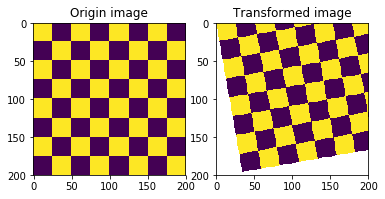

In [16]:
img=mpimg.imread('inputs/1.png')

plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Transformed image')

rotation_angle = 10
rotation_angle = np.deg2rad(rotation_angle)

roteated = Image_Rotation(img, rotation_angle)

plt.imshow(roteated)

plt.show();

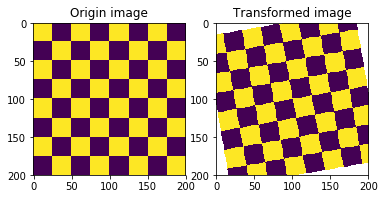

In [17]:
plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Transformed image')

rotation_angle = 10
rotation_angle = np.deg2rad(rotation_angle)

roteated = Image_Rotation_Center(img, rotation_angle)

plt.imshow(roteated)

plt.show();